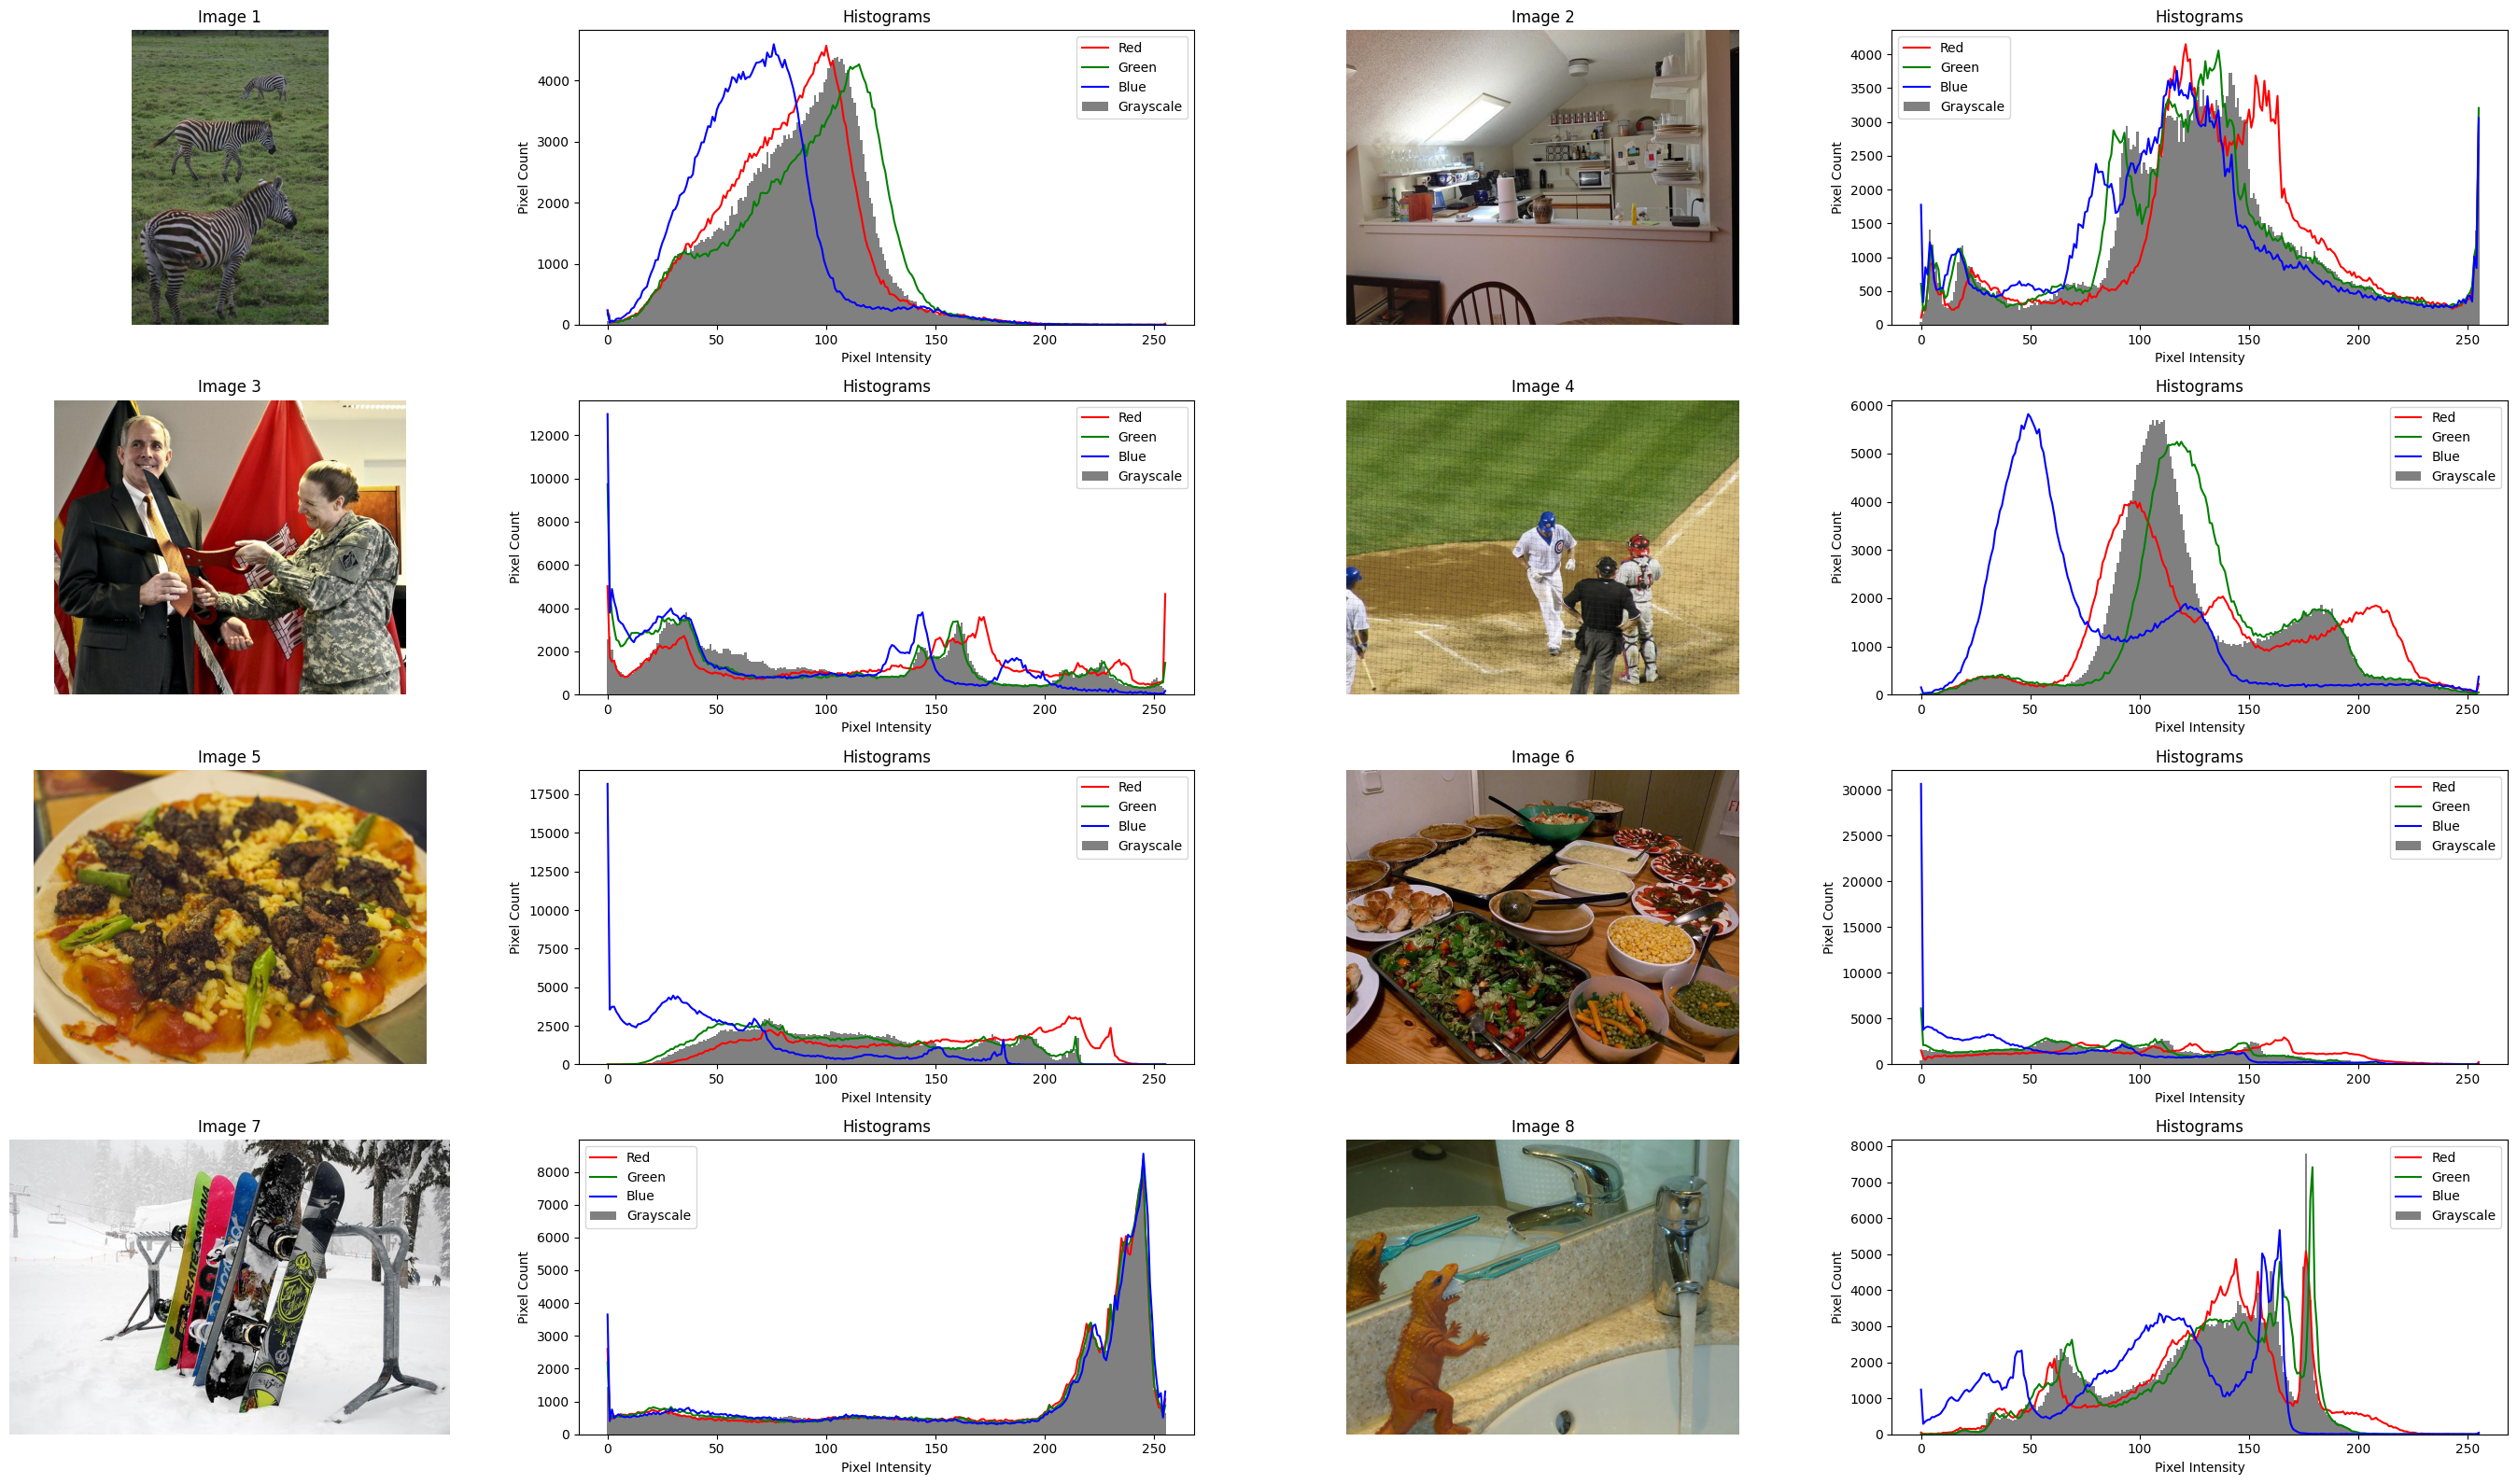

In [34]:
import os, cv2, numpy as np, matplotlib.pyplot as plt

# Path to the folder containing images
image_folder = "img_coco128"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# Limit to the first 8 images
image_files = image_files[ 31 : 31 + 8]

# Number of images
num_images = len(image_files)

# Create a figure for plotting
cols = 4  # 4 columns: Original Image and Combined Histogram side by side
rows = num_images//2  # Two rows for each image (image and histogram)
plt.figure(figsize=(cols * 7, rows * 4))

chart_idx = 0

for i, image_file in enumerate(image_files):
    # Read the image
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)
    
    # Convert to RGB and grayscale
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Compute histograms
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])
    hist_gray = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
    
    # Plot RGB image
    plt.subplot(rows, cols, chart_idx := chart_idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"Image {i+1}")
    plt.axis('off')
    
    # Plot Combined Histogram (RGB + Grayscale)
    plt.subplot(rows, cols, chart_idx := chart_idx + 1)
    plt.bar(range(256), hist_gray.ravel(), color='gray', width=1, label='Grayscale')
    plt.plot(hist_r, color='red', label='Red')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_b, color='blue', label='Blue')
    #plt.plot(hist_gray, color='black', linewidth=2, linestyle='--', label='Grayscale')
    plt.title("Histograms")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Pixel Count")
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
